In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For advanced imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For data normalization and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Load your CSV (replace filename with your file)
df = pd.read_excel("C:/Users/omkar/Documents/Grip Lab AI/Oura_GripStrengthcombined.xlsx")

# Convert date column
df['day'] = pd.to_datetime(df['day'])

# Sort by date
df = df.sort_values('day').reset_index(drop=True)

In [3]:
print("\nMissing Values Count:")
print(df.isnull().sum())



Missing Values Count:
day                           0
score                         4
resting_heart_rate            4
hrv_balance                   4
body temperature              4
spo2_percentage (average)     1
daily stress                  0
Energy Burned                 0
average_heart_rate            1
sleep score                   4
Respiratory rate (rpm)        1
Asleep duration (min)         1
In bed duration (min)         1
Light sleep duration (min)    1
Deep (SWS) duration (min)     1
REM duration (min)            1
Awake duration (min)          1
Sleep balance                 4
Sleep efficiency %            4
Sleep Latency (min)           4
Jamar_Pinch                   2
Squegg_TripodPinch            2
Handeful_Grip                 2
Squegg_Grip                   2
Handexer_Grip                 2
Dyno150_Grip                  2
Kinvent_Grip                  2
Baseline_Pinch                2
Jamar_Grip                    2
Squegg_LumbricalPinch         2
Squegg_LateralPin

In [4]:
# Cell 3: Impute Missing Values

# We will only impute numerical columns.
# Let's assume 'day' is just an identifier and we'll keep it separate.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Initialize the imputer
# It will estimate the missing values based on relationships with other columns
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer
# We use .fit_transform() which learns from the data and transforms it.
df_imputed = df.copy()
df_imputed[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify that there are no more missing values
print("Missing values after imputation:")
print(df_imputed.isnull().sum().sum())

# Let's see the cleaned data
df = df_imputed
df.head()

Missing values after imputation:
0


c:\Users\omkar\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,day,score,resting_heart_rate,hrv_balance,body temperature,spo2_percentage (average),daily stress,Energy Burned,average_heart_rate,sleep score,...,Handexer_Grip,Dyno150_Grip,Kinvent_Grip,Baseline_Pinch,Jamar_Grip,Squegg_LumbricalPinch,Squegg_LateralPinch,activity_balance,previous_day_activity,recovery_index
0,2025-03-06,81.0,84.0,84.0,98.0,96.528,normal,2568.0,48.250,70.0,...,127.623145,149.441687,121.844843,29.59222,126.465142,62.491368,64.424125,92.0,89.0,95.0
1,2025-03-07,79.0,99.0,86.0,100.0,95.557,normal,2676.0,48.375,73.0,...,125.650000,153.750000,116.550000,29.90000,136.750000,59.800000,66.650000,90.0,82.0,51.0
2,2025-03-08,84.0,77.0,87.0,90.0,95.712,stressful,2521.0,52.125,78.0,...,129.500000,152.000000,117.500000,29.80000,133.750000,60.500000,63.850000,90.0,80.0,100.0
3,2025-03-09,82.0,85.0,90.0,100.0,96.637,stressful,2596.0,0.000,65.0,...,125.900000,150.250000,113.000000,29.60000,136.050000,59.000000,65.000000,90.0,87.0,100.0
4,2025-03-10,82.0,94.0,90.0,100.0,96.506,stressful,2545.0,0.000,66.0,...,125.700000,151.800000,116.050000,30.15000,137.750000,63.150000,62.650000,88.0,82.0,73.0


In [5]:
df = df.dropna()

In [6]:
grip_cols = [col for col in df.columns if "grip" in col.lower() or "pinch" in col.lower()]
corr = df[["score"] + grip_cols].corr()['score'].sort_values(ascending=False)

print(corr)


score                    1.000000
Squegg_LumbricalPinch    0.196803
Squegg_Grip              0.174618
Jamar_Pinch              0.161645
Kinvent_Grip             0.153864
Dyno150_Grip             0.150750
Squegg_TripodPinch       0.149786
Handexer_Grip            0.144396
Handeful_Grip            0.089571
Squegg_LateralPinch      0.043695
Jamar_Grip               0.042724
Baseline_Pinch          -0.121467
Name: score, dtype: float64


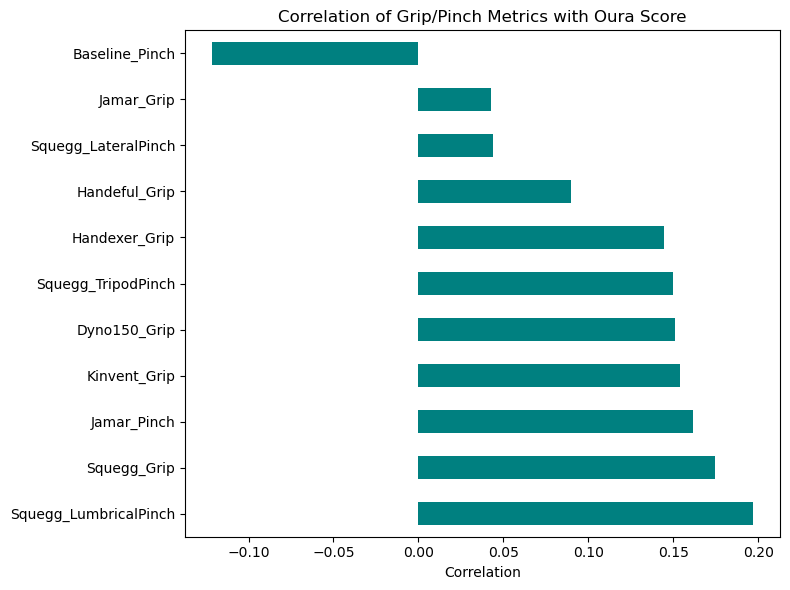

In [7]:
corr = df[['score'] + grip_cols].corr()['score'].sort_values(ascending=False)

# Drop self-correlation
corr = corr.drop('score')

corr.plot(kind="barh", figsize=(8,6), color="teal")
plt.title("Correlation of Grip/Pinch Metrics with Oura Score")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


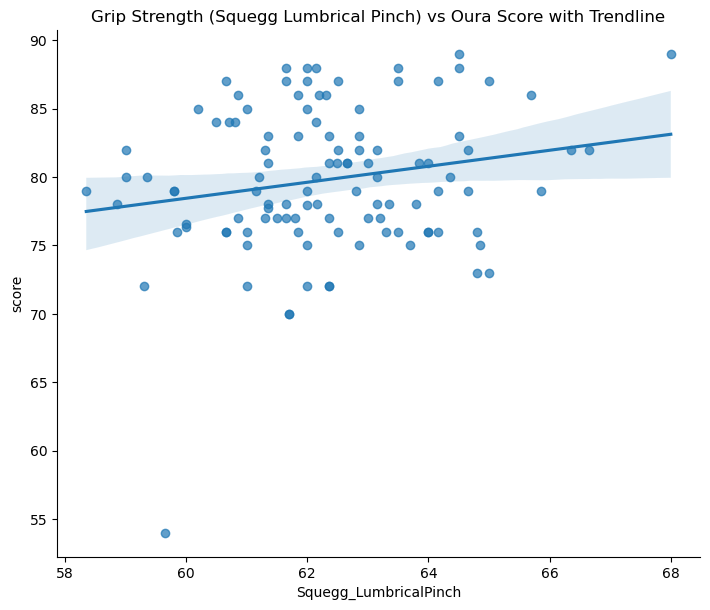

In [8]:
sns.lmplot(x="Squegg_LumbricalPinch", y="score", data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.7})
plt.title("Grip Strength (Squegg Lumbrical Pinch) vs Oura Score with Trendline")
plt.show()


In [9]:
# 2. Drop non-numeric columns: 'day' (datetime) + 'daily_stress' (object)
X = df.drop(columns=['day', 'score'])

# 3. Keep only numeric dtypes
X = X.select_dtypes(include=[np.number])

# 4. Target variable
y = df['score']

# 5. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)

X_scaled.head()


,resting_heart_rate,hrv_balance,body temperature,spo2_percentage (average),Energy Burned,average_heart_rate,sleep score,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),...,Handexer_Grip,Dyno150_Grip,Kinvent_Grip,Baseline_Pinch,Jamar_Grip,Squegg_LumbricalPinch,Squegg_LateralPinch,activity_balance,previous_day_activity,recovery_index
0,0.014202,0.103651,0.180927,0.064225,-0.091898,0.345996,0.344590,-0.243836,0.347316,0.287684,...,-0.007135,-0.012317,0.010824,0.058634,0.024697,0.080244,0.076685,1.140231,0.655456,0.391016
1,0.829808,0.290714,0.365332,-0.040676,0.755923,0.351832,0.724219,-0.948728,0.506389,0.484395,...,-0.085221,0.132851,-0.208296,0.595990,0.281129,-1.442894,1.637341,0.736911,-0.327272,-0.598387
2,-0.366414,0.384246,-0.556690,-0.023931,-0.460856,0.526925,1.356933,0.038121,1.009688,0.820552,...,0.067141,0.073885,-0.168982,0.421398,0.206330,-1.046740,-0.325858,0.736911,-0.608051,0.503448
3,0.068576,0.664840,0.365332,0.076001,0.127908,-1.906856,-0.288124,2.152796,-1.663271,-1.653326,...,-0.075327,0.014919,-0.355208,0.072216,0.263676,-1.895642,0.480456,0.736911,0.374677,0.503448
4,0.557940,0.664840,0.365332,0.061849,-0.272452,-1.906856,-0.161581,1.447904,-1.671094,-1.626552,...,-0.083242,0.067146,-0.228988,1.032467,0.306062,0.452987,-1.167229,0.333590,-0.327272,-0.103686


Feature Importances:
                       Feature  Importance
14              Sleep balance     0.202287
30              recovery_index    0.178124
5           average_heart_rate    0.144260
0           resting_heart_rate    0.125553
1                  hrv_balance    0.044469
6                  sleep score    0.037893
20                 Squegg_Grip    0.021924
22                Dyno150_Grip    0.020562
23                Kinvent_Grip    0.018885
21               Handexer_Grip    0.017064
27         Squegg_LateralPinch    0.016986
4                Energy Burned    0.014048
29       previous_day_activity    0.013985
25                  Jamar_Grip    0.013158
19               Handeful_Grip    0.012274
12          REM duration (min)    0.011547
17                 Jamar_Pinch    0.010018
16         Sleep Latency (min)    0.009435
24              Baseline_Pinch    0.008967
15          Sleep efficiency %    0.008343
3    spo2_percentage (average)    0.008335
8        Asleep duration (min)   

C:\Users\omkar\AppData\Local\Temp\ipykernel_20244\381557205.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


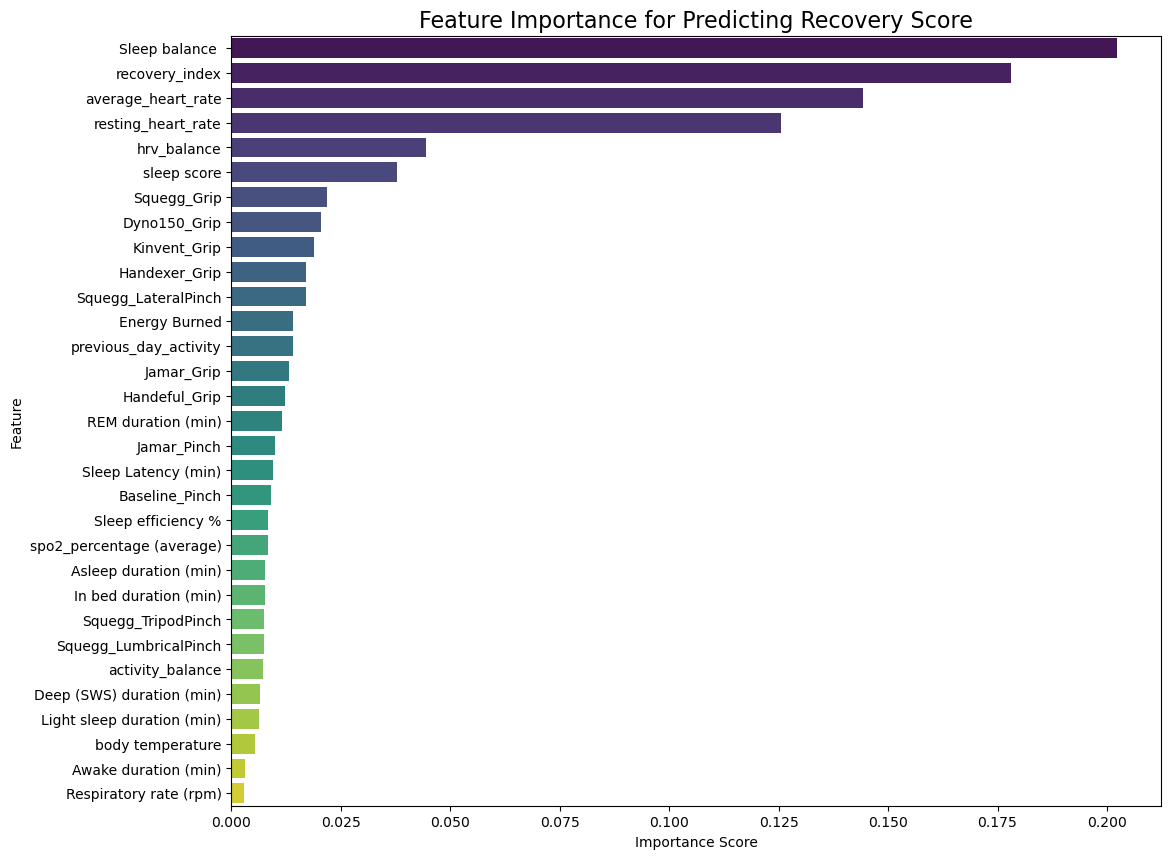

In [10]:

from sklearn.ensemble import RandomForestRegressor

# --- Train a Model to Find Feature Importance ---
# We use a RandomForestRegressor because it can determine feature importance easily.
# We train it on all our data for this analysis.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# --- Extract and Plot Feature Importance ---
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# --- Plot the results ---
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Recovery Score', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

XGBoost Feature Importances:
                       Feature  Importance
5           average_heart_rate    0.340617
14              Sleep balance     0.221894
22                Dyno150_Grip    0.072502
30              recovery_index    0.071949
27         Squegg_LateralPinch    0.043463
25                  Jamar_Grip    0.031025
16         Sleep Latency (min)    0.027554
0           resting_heart_rate    0.026024
6                  sleep score    0.024750
29       previous_day_activity    0.022420
26       Squegg_LumbricalPinch    0.011565
24              Baseline_Pinch    0.011387
7       Respiratory rate (rpm)    0.011172
10  Light sleep duration (min)    0.010839
8        Asleep duration (min)    0.009887
12          REM duration (min)    0.008952
1                  hrv_balance    0.008220
3    spo2_percentage (average)    0.008080
11   Deep (SWS) duration (min)    0.007874
13        Awake duration (min)    0.004260
28            activity_balance    0.004118
17                 Jamar_

C:\Users\omkar\AppData\Local\Temp\ipykernel_20244\1400321617.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='rocket')


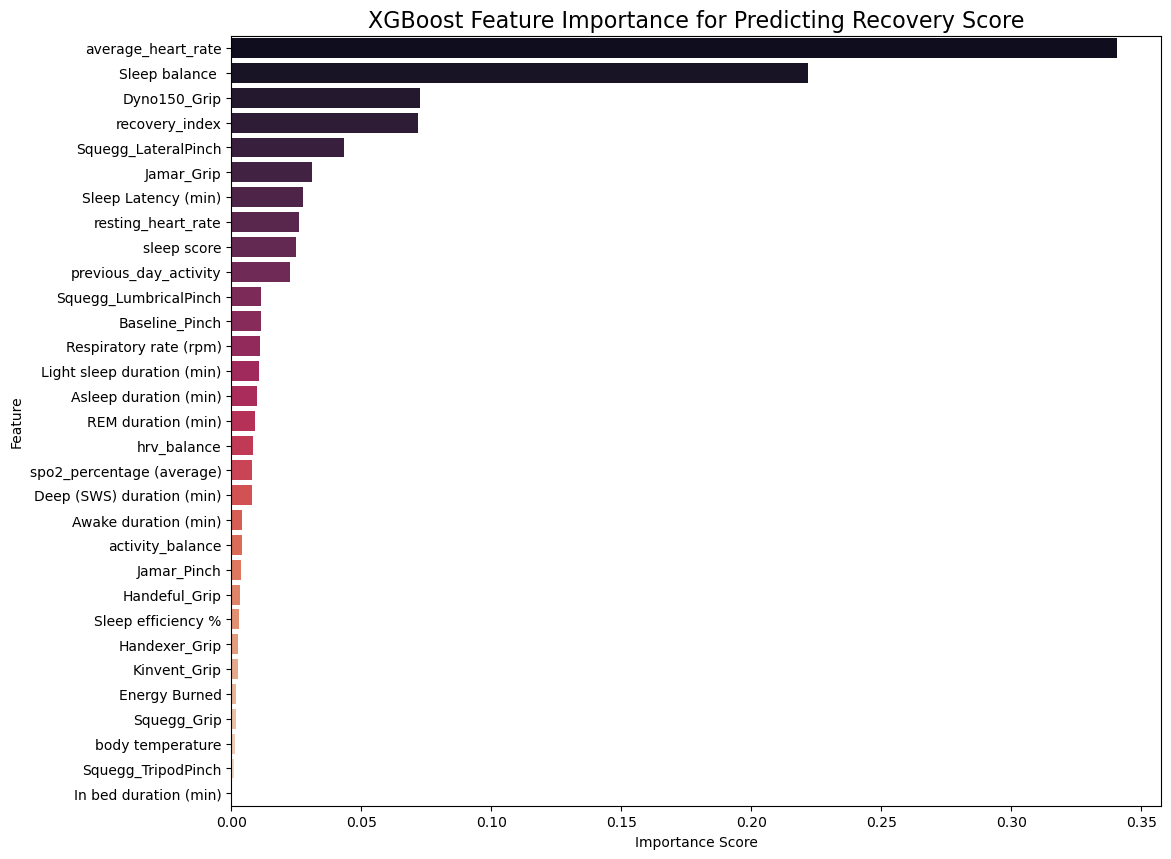

In [11]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_scaled, y, and X are already defined as in your example

# --- Train an XGBoost Model to Find Feature Importance ---
# We use XGBRegressor, the XGBoost equivalent for regression tasks.
# We train it on all our data for this analysis.
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=100, objective='reg:squarederror')
xgb_model.fit(X_scaled, y)

# --- Extract and Plot Feature Importance ---
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importances:")
print(importance_df_xgb)

# --- Plot the results ---
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='rocket')
plt.title('XGBoost Feature Importance for Predicting Recovery Score', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


CatBoost Feature Importances:
                       Feature  Importance
30              recovery_index   22.031946
0           resting_heart_rate   20.037479
14              Sleep balance    14.914772
5           average_heart_rate    6.557351
22                Dyno150_Grip    3.728719
1                  hrv_balance    2.983284
29       previous_day_activity    2.862696
6                  sleep score    2.686828
9        In bed duration (min)    2.585158
20                 Squegg_Grip    2.293011
12          REM duration (min)    2.013890
28            activity_balance    2.004763
23                Kinvent_Grip    1.636788
16         Sleep Latency (min)    1.498430
11   Deep (SWS) duration (min)    1.470134
18          Squegg_TripodPinch    1.419994
26       Squegg_LumbricalPinch    1.339081
24              Baseline_Pinch    1.337360
25                  Jamar_Grip    1.084944
3    spo2_percentage (average)    1.028237
17                 Jamar_Pinch    0.708679
10  Light sleep duratio

C:\Users\omkar\AppData\Local\Temp\ipykernel_20244\321108878.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_cat, palette='mako')


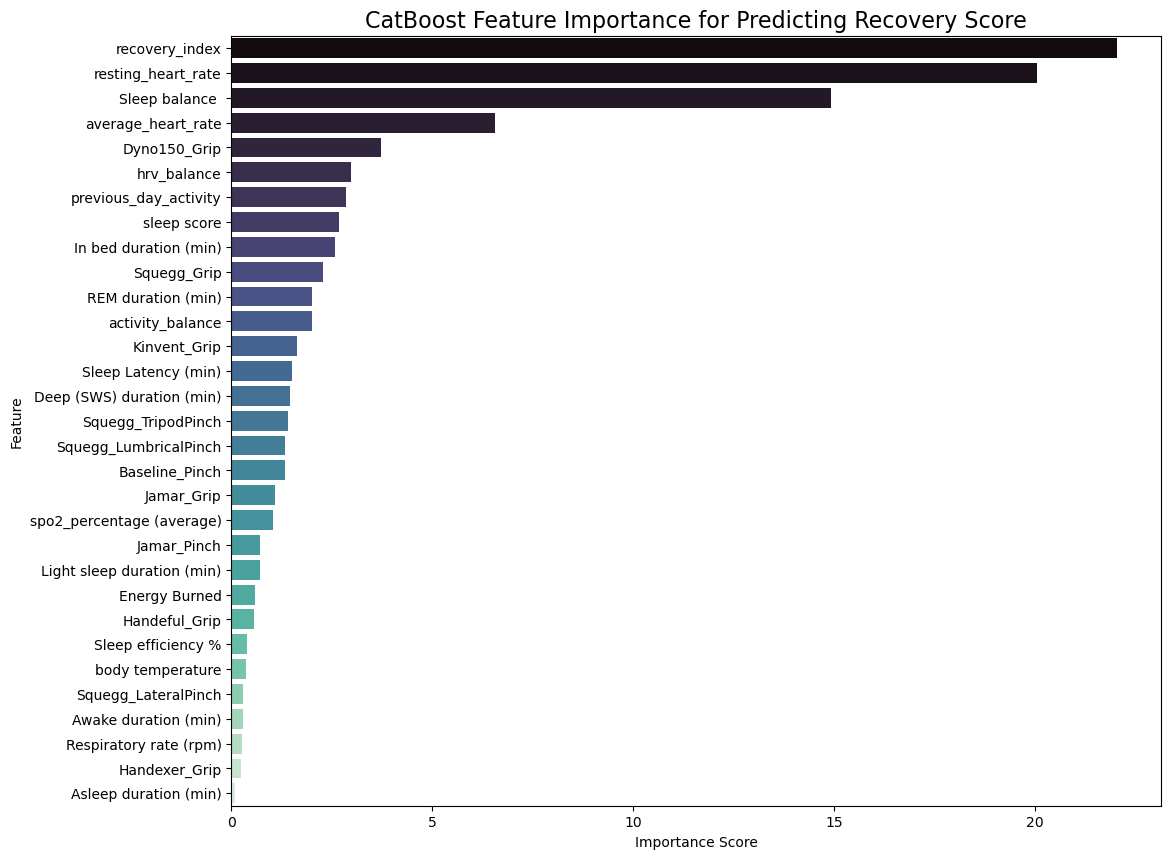

In [12]:
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_scaled, y, and X are already defined

# --- Train a CatBoost Model to Find Feature Importance ---
# We use CatBoostRegressor for this regression task.
# The 'verbose=0' parameter prevents it from printing training progress for every iteration.
cat_model = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
cat_model.fit(X_scaled, y)

# --- Extract and Plot Feature Importance ---
importances = cat_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_cat = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nCatBoost Feature Importances:")
print(importance_df_cat)

# --- Plot the results ---
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df_cat, palette='mako')
plt.title('CatBoost Feature Importance for Predicting Recovery Score', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
# --- 1. Identify all your grip strength columns ---
grip_cols = [
    'Squegg_TripodPinch', 'Handeful_Grip', 'Squegg_Grip', 'Handexer_Grip',
    'Dyno150_Grip', 'Kinvent_Grip', 'Baseline_Pinch', 'Jamar_Grip',
    'Squegg_LumbricalPinch', 'Squegg_LateralPinch'
]

# --- 2. Standardize each grip column (mean=0, std=1) ---
# This puts all devices on a common scale.
scaler = StandardScaler()
# Note: Use .copy() to avoid SettingWithCopyWarning
grip_data_scaled = df[grip_cols].copy()
grip_data_scaled[grip_cols] = scaler.fit_transform(grip_data_scaled[grip_cols])

# --- 3. Create the unified 'Grip_Strength_Index' ---
# Calculate the average of the scaled values for each row
df['Grip_Strength_Index'] = grip_data_scaled.mean(axis=1)

print("Created 'Grip_Strength_Index' feature.")
print(df[['Grip_Strength_Index', 'score']].head())

Created 'Grip_Strength_Index' feature.
   Grip_Strength_Index  score
0             0.023602   81.0
1             0.067520   79.0
2            -0.136360   84.0
3            -0.197608   82.0
4             0.086310   82.0


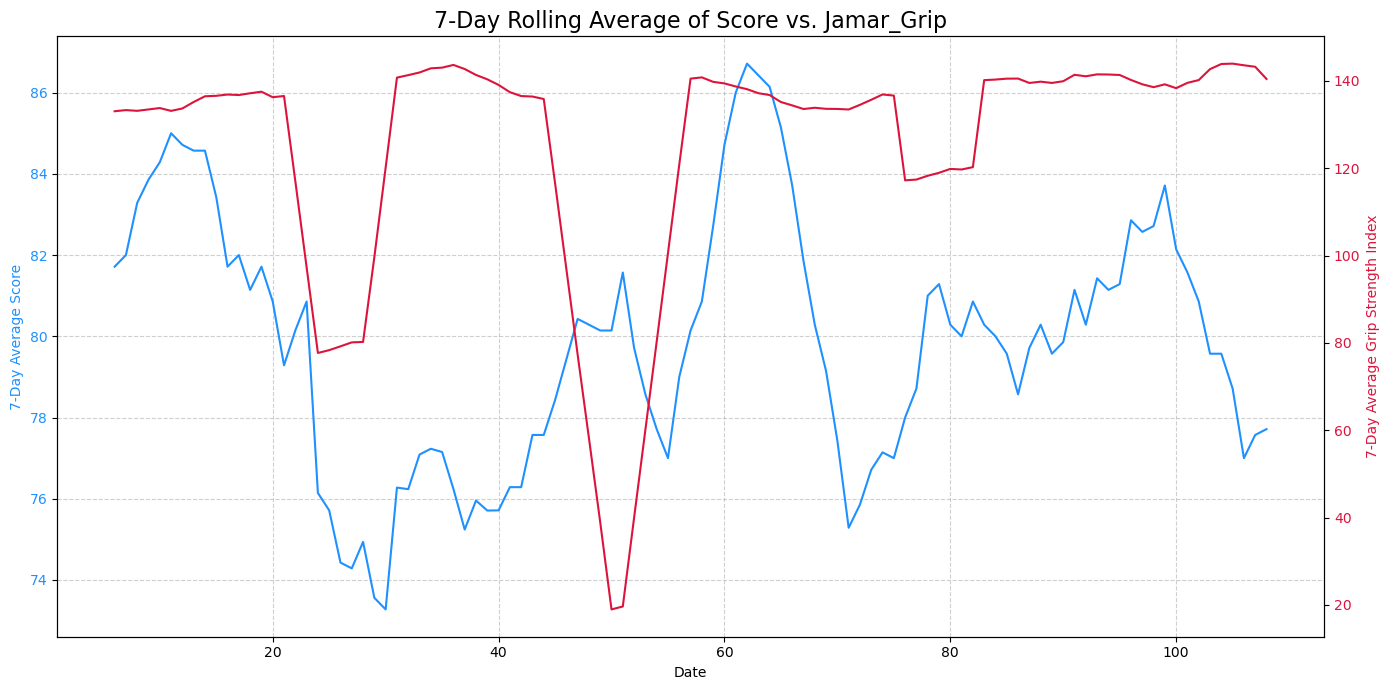

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and is sorted by date
# Let's also add a 7-day rolling average to see the trend more clearly
df['score_7day_avg'] = df['score'].rolling(window=7).mean()
df['grip_7day_avg'] = df['Jamar_Grip'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the 7-day average score on the primary y-axis
ax1.plot(df.index, df['score_7day_avg'], color='dodgerblue', label='7-Day Avg Score')
ax1.set_xlabel('Date')
ax1.set_ylabel('7-Day Average Score', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['grip_7day_avg'], color='crimson', label='7-Day Avg Grip Index')
ax2.set_ylabel('7-Day Average Grip Strength Index', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('7-Day Rolling Average of Score vs. Jamar_Grip', fontsize=16)
fig.tight_layout()
plt.show()

Displaying SHAP Detailed Summary Plot...


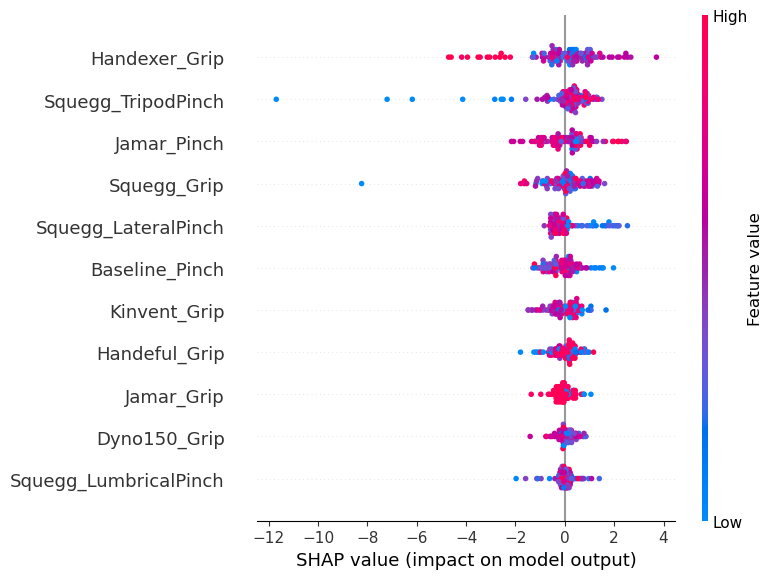

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap

# Assume 'df' is your full DataFrame

# --- 1. Define Features and Target ---
features = [
'Squegg_LumbricalPinch','Squegg_Grip','Kinvent_Grip','Dyno150_Grip','Jamar_Pinch','Squegg_TripodPinch',
'Handexer_Grip','Handeful_Grip','Squegg_LateralPinch','Jamar_Grip','Baseline_Pinch'
]
target = 'score'

# --- 2. Create Initial X and y ---
X = df[features]
y = df[target]

# --- 3. Handle Missing Values (Crucial Step) ---
# Drop rows with missing values from X first
X_clean = X.dropna()
# Ensure y aligns with the cleaned X
y_clean = y.loc[X_clean.index]

# --- 4. Scale the CLEAN data ---
# Now, create the scaled version from the cleaned DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# --- 5. Train the Model ---
model = xgb.XGBRegressor(random_state=42)
model.fit(X_scaled, y_clean)

# --- 6. Calculate and Plot SHAP Values (Now Shapes Will Match) ---
explainer = shap.TreeExplainer(model)
# Calculate SHAP values on the scaled data
shap_values = explainer.shap_values(X_scaled)

# Plot against the original, unscaled but clean data (X_clean)
# This works because X_clean and X_scaled now have the same number of rows.
print("Displaying SHAP Detailed Summary Plot...")
shap.summary_plot(shap_values, X_clean, show=True)

In [16]:
"""
Oura Ring Score Prediction & Grip Strength Impact Analysis
===========================================================
Goal: Analyze how grip strength measurements correlate with Oura readiness score
      and identify which instruments/metrics are most important for improving score
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("="*100)
print("OURA RING SCORE ANALYSIS: IMPACT OF GRIP STRENGTH & KEY PREDICTORS")
print("="*100)
print("\nOBJECTIVES:")
print("  1. Understand relationship between grip strength and Oura score")
print("  2. Identify which grip instruments are most predictive of score")
print("  3. Determine which Oura metrics most affect score")
print("  4. Provide actionable recommendations to improve score")
print("="*100)

# ============================================================================
# 1. DATA LOADING AND PREPARATION
# ============================================================================

print("\n\n1. DATA LOADING AND TARGET VARIABLE ANALYSIS")
print("-" * 100)

df = pd.read_excel("C:/Users/omkar/Documents/Grip Lab AI/Oura_GripStrengthcombined.xlsx")
df['day'] = pd.to_datetime(df['day'])

print("DEBUG: Columns in dataframe:")
print(df.columns.tolist())

print(f"Dataset shape: {df.shape}")
print(f"Target variable: 'score' (Oura Readiness Score)")
print(f"\nTarget variable statistics:")
print(f"  Current Score: {df['score'].values[0]}")
print(f"  Score Range: 0-100 (theoretical)")


OURA RING SCORE ANALYSIS: IMPACT OF GRIP STRENGTH & KEY PREDICTORS

OBJECTIVES:
  1. Understand relationship between grip strength and Oura score
  2. Identify which grip instruments are most predictive of score
  3. Determine which Oura metrics most affect score
  4. Provide actionable recommendations to improve score


1. DATA LOADING AND TARGET VARIABLE ANALYSIS
----------------------------------------------------------------------------------------------------
DEBUG: Columns in dataframe:
['day', 'score', 'resting_heart_rate', 'hrv_balance', 'body temperature', 'spo2_percentage (average)', 'daily stress', 'Energy Burned', 'average_heart_rate', 'sleep score', 'Respiratory rate (rpm)', 'Asleep duration (min)', 'In bed duration (min)', 'Light sleep duration (min)', 'Deep (SWS) duration (min)', 'REM duration (min)', 'Awake duration (min)', 'Sleep balance ', 'Sleep efficiency %', 'Sleep Latency (min)', 'Jamar_Pinch', 'Squegg_TripodPinch', 'Handeful_Grip', 'Squegg_Grip', 'Handexer_Grip',

In [17]:
# Define feature categories (matching YOUR actual column names)
OURA_FEATURES = {
    'Recovery': ['recovery_index', 'hrv_balance', 'resting_heart_rate'],
    'Sleep': ['sleep score', 'Sleep efficiency %', 'Asleep duration (min)', 'Deep (SWS) duration (min)', 
              'REM duration (min)', 'Sleep Latency (min)', 'Sleep balance ', 'Light sleep duration (min)',
              'Awake duration (min)', 'In bed duration (min)', 'Respiratory rate (rpm)'],
    'Activity': ['Energy Burned', 'average_heart_rate', 'activity_balance', 'previous_day_activity'],
    'Vitals': ['body temperature', 'spo2_percentage (average)']
}

GRIP_INSTRUMENTS = {
    'Grip_Devices': ['Jamar_Grip', 'Squegg_Grip', 'Handexer_Grip', 'Dyno150_Grip', 
                     'Kinvent_Grip', 'Handeful_Grip'],
    'Pinch_Devices': ['Jamar_Pinch', 'Baseline_Pinch', 'Squegg_TripodPinch', 
                      'Squegg_LumbricalPinch', 'Squegg_LateralPinch']
}

# Flatten feature lists
all_oura_features = []
for category_features in OURA_FEATURES.values():
    for feature in category_features:
        if feature in df.columns:
            all_oura_features.append(feature)

all_grip_features = []
for category_features in GRIP_INSTRUMENTS.values():
    for feature in category_features:
        if feature in df.columns:
            all_grip_features.append(feature)

print(f"\nOura ring features: {len(all_oura_features)}")
print(f"  Available: {all_oura_features}")
print(f"\nGrip strength features: {len(all_grip_features)}")
print(f"  Available: {all_grip_features}")
print(f"\nTotal features for analysis: {len(all_oura_features) + len(all_grip_features)}")



Oura ring features: 20
  Available: ['recovery_index', 'hrv_balance', 'resting_heart_rate', 'sleep score', 'Sleep efficiency %', 'Asleep duration (min)', 'Deep (SWS) duration (min)', 'REM duration (min)', 'Sleep Latency (min)', 'Sleep balance ', 'Light sleep duration (min)', 'Awake duration (min)', 'In bed duration (min)', 'Respiratory rate (rpm)', 'Energy Burned', 'average_heart_rate', 'activity_balance', 'previous_day_activity', 'body temperature', 'spo2_percentage (average)']

Grip strength features: 11
  Available: ['Jamar_Grip', 'Squegg_Grip', 'Handexer_Grip', 'Dyno150_Grip', 'Kinvent_Grip', 'Handeful_Grip', 'Jamar_Pinch', 'Baseline_Pinch', 'Squegg_TripodPinch', 'Squegg_LumbricalPinch', 'Squegg_LateralPinch']

Total features for analysis: 31




2. CORRELATION ANALYSIS: WHAT AFFECTS SCORE?
----------------------------------------------------------------------------------------------------

📊 TOP 10 FEATURES MOST CORRELATED WITH SCORE (Positive):
recovery_index           0.554973
resting_heart_rate       0.528588
Sleep balance            0.460817
sleep score              0.358707
hrv_balance              0.230108
previous_day_activity    0.204845
Squegg_LumbricalPinch    0.181789
Jamar_Pinch              0.166305
Squegg_Grip              0.164498
Dyno150_Grip             0.160131
Name: score, dtype: float64

📊 TOP 10 FEATURES MOST NEGATIVELY CORRELATED WITH SCORE:
Squegg_LateralPinch          0.028917
Deep (SWS) duration (min)    0.016657
spo2_percentage (average)    0.001690
Awake duration (min)        -0.022690
Energy Burned               -0.030045
Sleep Latency (min)         -0.055952
activity_balance            -0.079607
Baseline_Pinch              -0.106628
Respiratory rate (rpm)      -0.127355
average_heart_rate        

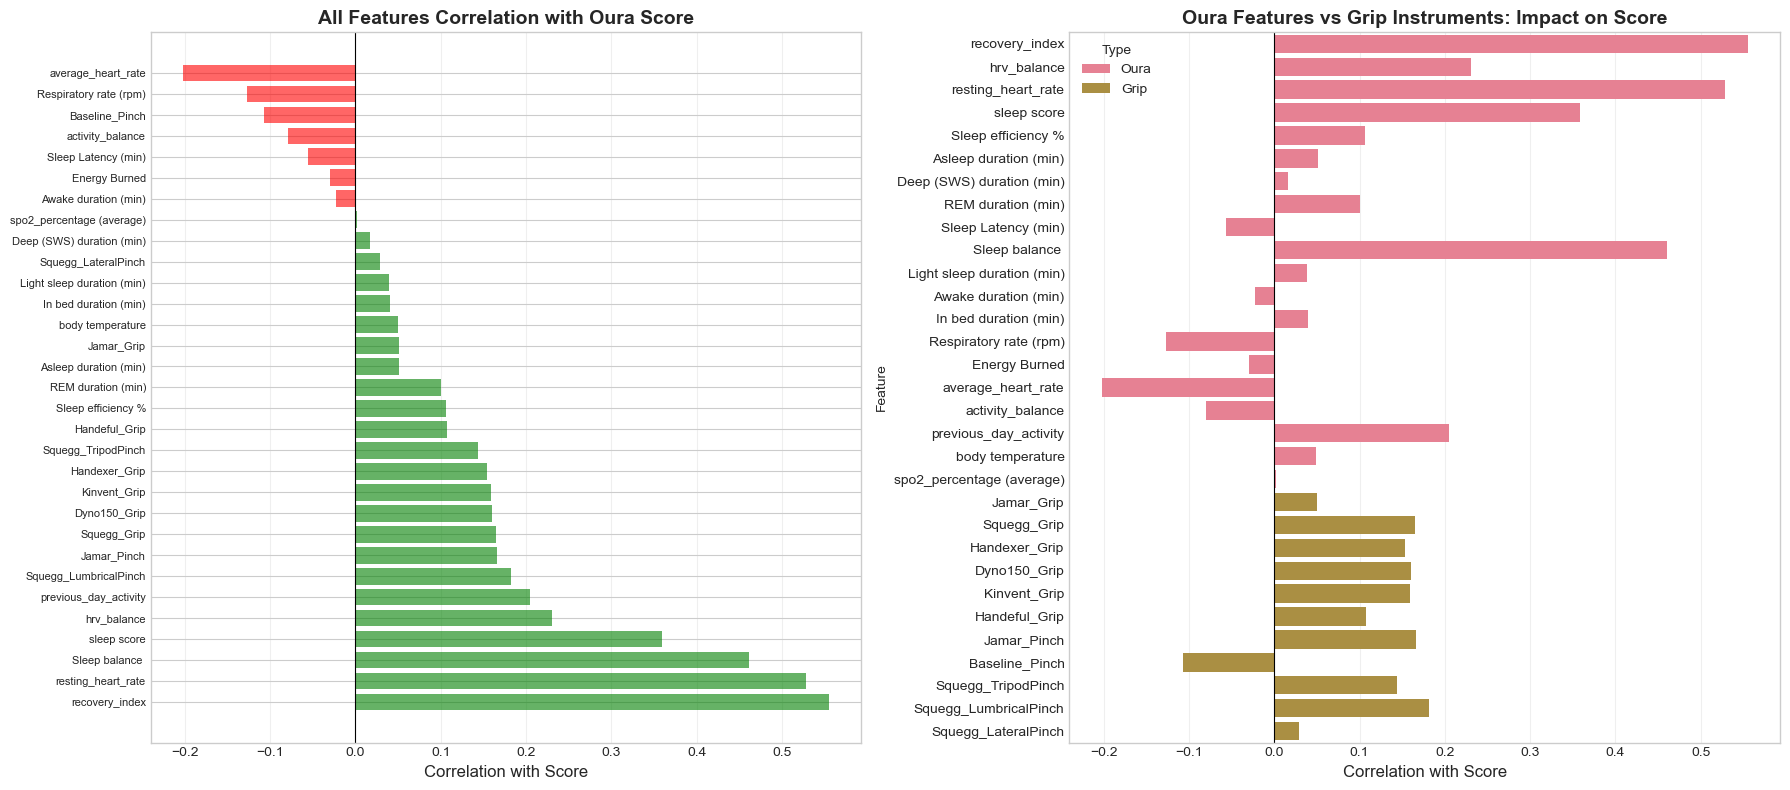

In [18]:
# ============================================================================
# 2. CORRELATION ANALYSIS WITH SCORE (TARGET)
# ============================================================================

print("\n\n2. CORRELATION ANALYSIS: WHAT AFFECTS SCORE?")
print("-" * 100)

# Calculate correlations with score
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('score')  # Remove target from features

correlations_with_score = df[numeric_cols + ['score']].corr()['score'].drop('score').sort_values(ascending=False)

print("\n📊 TOP 10 FEATURES MOST CORRELATED WITH SCORE (Positive):")
print(correlations_with_score.head(10))

print("\n📊 TOP 10 FEATURES MOST NEGATIVELY CORRELATED WITH SCORE:")
print(correlations_with_score.tail(10))

# Visualize correlations with score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# All correlations
colors = ['green' if x > 0 else 'red' for x in correlations_with_score.values]
ax1.barh(range(len(correlations_with_score)), correlations_with_score.values, color=colors, alpha=0.6)
ax1.set_yticks(range(len(correlations_with_score)))
ax1.set_yticklabels(correlations_with_score.index, fontsize=8)
ax1.set_xlabel('Correlation with Score', fontsize=12)
ax1.set_title('All Features Correlation with Oura Score', fontsize=14, fontweight='bold')
ax1.axvline(0, color='black', linewidth=0.8)
ax1.grid(axis='x', alpha=0.3)

# Separate Oura vs Grip features
oura_corr = correlations_with_score[[f for f in all_oura_features if f in correlations_with_score.index]]
grip_corr = correlations_with_score[[f for f in all_grip_features if f in correlations_with_score.index]]

combined_data = pd.DataFrame({
    'Feature': list(oura_corr.index) + list(grip_corr.index),
    'Correlation': list(oura_corr.values) + list(grip_corr.values),
    'Type': ['Oura']*len(oura_corr) + ['Grip']*len(grip_corr)
})

sns.barplot(data=combined_data, y='Feature', x='Correlation', hue='Type', ax=ax2)
ax2.set_title('Oura Features vs Grip Instruments: Impact on Score', fontsize=14, fontweight='bold')
ax2.axvline(0, color='black', linewidth=0.8)
ax2.set_xlabel('Correlation with Score', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



3. GRIP STRENGTH INSTRUMENTS: WHICH IS MOST IMPORTANT?
----------------------------------------------------------------------------------------------------

🔍 Correlation of Each Grip Instrument with Score:
  1. Squegg_LumbricalPinch          | Correlation: +0.182 | WEAK positive
  2. Jamar_Pinch                    | Correlation: +0.166 | WEAK positive
  3. Squegg_Grip                    | Correlation: +0.164 | WEAK positive
  4. Dyno150_Grip                   | Correlation: +0.160 | WEAK positive
  5. Kinvent_Grip                   | Correlation: +0.159 | WEAK positive
  6. Handexer_Grip                  | Correlation: +0.154 | WEAK positive
  7. Squegg_TripodPinch             | Correlation: +0.143 | WEAK positive
  8. Handeful_Grip                  | Correlation: +0.108 | WEAK positive
  9. Jamar_Grip                     | Correlation: +0.051 | WEAK positive
  10. Squegg_LateralPinch            | Correlation: +0.029 | WEAK positive
  11. Baseline_Pinch                 | Correlation

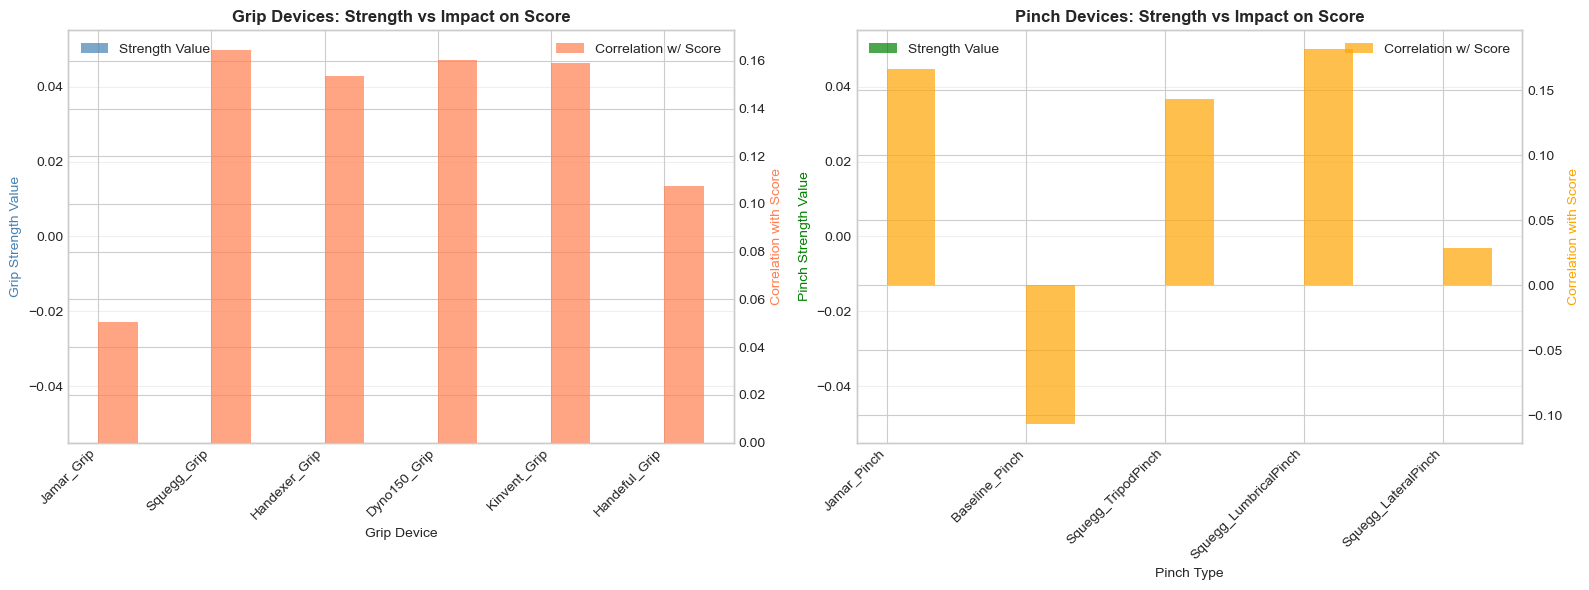

In [19]:


# ============================================================================
# 3. GRIP STRENGTH INSTRUMENT COMPARISON
# ============================================================================

print("\n\n3. GRIP STRENGTH INSTRUMENTS: WHICH IS MOST IMPORTANT?")
print("-" * 100)

if all_grip_features:
    print("\n🔍 Correlation of Each Grip Instrument with Score:")
    grip_score_corr = correlations_with_score[[f for f in all_grip_features if f in correlations_with_score.index]].sort_values(ascending=False)
    
    for idx, (instrument, corr) in enumerate(grip_score_corr.items(), 1):
        strength = "STRONG" if abs(corr) > 0.7 else "MODERATE" if abs(corr) > 0.4 else "WEAK"
        direction = "positive" if corr > 0 else "negative"
        print(f"  {idx}. {instrument:30s} | Correlation: {corr:+.3f} | {strength} {direction}")
    
    # Separate grip and pinch
    grip_devices = [f for f in GRIP_INSTRUMENTS['Grip_Devices'] if f in df.columns]
    pinch_devices = [f for f in GRIP_INSTRUMENTS['Pinch_Devices'] if f in df.columns]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Grip devices
    if grip_devices:
        grip_vals = df[grip_devices].iloc[0]
        grip_corrs = correlations_with_score[[f for f in grip_devices if f in correlations_with_score.index]]
        
        ax = axes[0]
        x = np.arange(len(grip_vals))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, grip_vals, width, label='Strength Value', color='steelblue', alpha=0.7)
        ax2 = ax.twinx()
        bars2 = ax2.bar(x + width/2, grip_corrs.values, width, label='Correlation w/ Score', color='coral', alpha=0.7)
        
        ax.set_xlabel('Grip Device')
        ax.set_ylabel('Grip Strength Value', color='steelblue')
        ax2.set_ylabel('Correlation with Score', color='coral')
        ax.set_xticks(x)
        ax.set_xticklabels([g.replace('_grip', '') for g in grip_vals.index], rotation=45, ha='right')
        ax.set_title('Grip Devices: Strength vs Impact on Score', fontweight='bold', fontsize=12)
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
        ax.grid(axis='y', alpha=0.3)
    
    # Pinch devices
    if pinch_devices:
        pinch_vals = df[pinch_devices].iloc[0]
        pinch_corrs = correlations_with_score[[f for f in pinch_devices if f in correlations_with_score.index]]
        
        ax = axes[1]
        x = np.arange(len(pinch_vals))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, pinch_vals, width, label='Strength Value', color='green', alpha=0.7)
        ax2 = ax.twinx()
        bars2 = ax2.bar(x + width/2, pinch_corrs.values, width, label='Correlation w/ Score', color='orange', alpha=0.7)
        
        ax.set_xlabel('Pinch Type')
        ax.set_ylabel('Pinch Strength Value', color='green')
        ax2.set_ylabel('Correlation with Score', color='orange')
        ax.set_xticks(x)
        ax.set_xticklabels([p.replace('_pinch', '').replace('squegg_', '') for p in pinch_vals.index], rotation=45, ha='right')
        ax.set_title('Pinch Devices: Strength vs Impact on Score', fontweight='bold', fontsize=12)
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [20]:
# Calculate the standard deviation to check for variability
# A much lower value for Jamar_Grip would support the "ceiling effect" hypothesis
variability = df[['Jamar_Grip', 'Squegg_Grip', 'Handexer_Grip', 'Dyno150_Grip', 
                     'Kinvent_Grip', 'Handeful_Grip','Jamar_Pinch', 'Baseline_Pinch', 'Squegg_TripodPinch', 
                      'Squegg_LumbricalPinch', 'Squegg_LateralPinch']].std()

print("--- Variability Check (Standard Deviation) ---")
print(variability)

--- Variability Check (Standard Deviation) ---
Jamar_Grip               40.670941
Squegg_Grip               4.549710
Handexer_Grip            25.623404
Dyno150_Grip             30.093110
Kinvent_Grip             24.503646
Handeful_Grip            41.362981
Jamar_Pinch               5.715858
Baseline_Pinch            0.580777
Squegg_TripodPinch        2.341431
Squegg_LumbricalPinch     1.791674
Squegg_LateralPinch       1.445139
dtype: float64


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For advanced imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For data normalization and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Load your CSV (replace filename with your file)
df = pd.read_excel("C:/Users/omkar/Documents/Grip Lab AI/Oura_GripStrengthcombined.xlsx")

# Convert date column
df['day'] = pd.to_datetime(df['day'])

# Sort by date
df = df.sort_values('day').reset_index(drop=True)

In [41]:
df.head()

,day,score,resting_heart_rate,hrv_balance,body temperature,spo2_percentage (average),daily stress,Energy Burned,average_heart_rate,sleep score,...,Handexer_Grip,Dyno150_Grip,Kinvent_Grip,Baseline_Pinch,Jamar_Grip,Squegg_LumbricalPinch,Squegg_LateralPinch,activity_balance,previous_day_activity,recovery_index
0,2025-03-06,81.0,84.0,84.0,98.0,96.528,normal,2568,48.250,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,89.0,95.0
1,2025-03-07,79.0,99.0,86.0,100.0,95.557,normal,2676,48.375,73.0,...,125.65,153.75,116.55,29.90,136.75,59.80,66.65,90.0,82.0,51.0
2,2025-03-08,84.0,77.0,87.0,90.0,95.712,stressful,2521,52.125,78.0,...,129.50,152.00,117.50,29.80,133.75,60.50,63.85,90.0,80.0,100.0
3,2025-03-09,82.0,85.0,90.0,100.0,96.637,stressful,2596,0.000,65.0,...,125.90,150.25,113.00,29.60,136.05,59.00,65.00,90.0,87.0,100.0
4,2025-03-10,82.0,94.0,90.0,100.0,96.506,stressful,2545,0.000,66.0,...,125.70,151.80,116.05,30.15,137.75,63.15,62.65,88.0,82.0,73.0


Original data: 109 rows
Data for modeling (after dropping NaN scores): 105 rows

Initializing and fitting Imputer and Scaler...
Preprocessing complete.
Training on 84 samples, testing on 21 samples.

Training CatBoost model...
Model training complete.

--- Model Performance (on Test Data) ---
RMSE: 1.88
R-squared: 0.84

Generating new 'ML_Adjusted_Score_Squegg' for all data...
Successfully created 'ML_Adjusted_Score_Squegg' column!


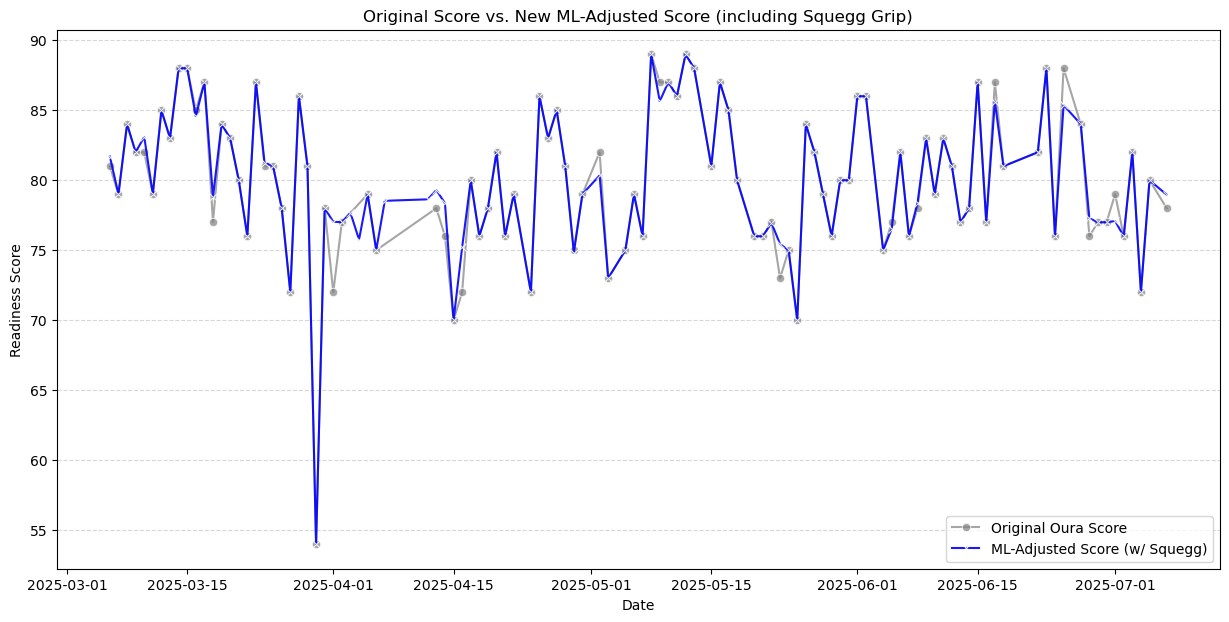


--- Days where Squegg Grip made the biggest POSITIVE impact (vs. original score) ---
          day  score  ML_Adjusted_Score_Squegg  Score_Difference_Squegg  \
26 2025-04-01   72.0                 77.035939                 5.035939   
37 2025-04-16   72.0                 75.207235                 3.207235   
69 2025-05-23   73.0                 75.436925                 2.436925   
35 2025-04-14   76.0                 78.358121                 2.358121   
12 2025-03-18   77.0                 78.802963                 1.802963   

    Squegg_Grip  
26        145.5  
37        148.5  
69        154.2  
35        144.8  
12        149.5  

--- Days where Squegg Grip made the biggest NEGATIVE impact (vs. original score) ---
           day  score  ML_Adjusted_Score_Squegg  Score_Difference_Squegg  \
98  2025-06-25   88.0                 85.367352                -2.632648   
103 2025-07-01   79.0                 77.084202                -1.915798   
51  2025-05-02   82.0                 80.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Define Features and Target ---
oura_features = [
    'recovery_index', 'hrv_balance', 'resting_heart_rate', 'sleep score', 
    'Sleep efficiency %', 'Asleep duration (min)', 'Deep (SWS) duration (min)', 
    'REM duration (min)', 'Sleep Latency (min)', 'Sleep balance ', 
    'Light sleep duration (min)', 'Awake duration (min)', 'In bed duration (min)', 
    'Respiratory rate (rpm)', 'Energy Burned', 'average_heart_rate', 
    'activity_balance', 'previous_day_activity', 'body temperature', 
    'spo2_percentage (average)'
]
grip_feature = ['Squegg_Grip']
target_col = 'score'

# Check which columns actually exist in your dataframe
feature_cols = [col for col in oura_features + grip_feature if col in df.columns]

if 'Squegg_Grip' not in feature_cols:
    print("Warning: 'squegg_grip' column not found. Check spelling.")

# --- 2. CRITICAL FIX: Handle Missing Target Values ---
# Create a new DataFrame for modeling, dropping rows where 'score' is NaN
df_model_data = df.dropna(subset=[target_col]).copy()

print(f"Original data: {len(df)} rows")
print(f"Data for modeling (after dropping NaN scores): {len(df_model_data)} rows")

# Separate features (X) and target (y) from this cleaned data
X = df_model_data[feature_cols]
y = df_model_data[target_col]

# --- 3. Preprocessing (Imputation & Scaling) ---
# We will fit our preprocessors ONLY on this training data
print("\nInitializing and fitting Imputer and Scaler...")
imputer = IterativeImputer(max_iter=10, random_state=42)
scaler = StandardScaler()

# Fit and transform the features (X)
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

print("Preprocessing complete.")

# --- 4. Train/Test Split ---
# Split the preprocessed data for validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

# --- 5. Train the CatBoost Model ---
cb_model = CatBoostRegressor(n_estimators=500,
                           learning_rate=0.07,
                           depth=6,
                           random_state=42, 
                           verbose=0) 

print("\nTraining CatBoost model...")
cb_model.fit(X_train, y_train)
print("Model training complete.")

# --- 6. Evaluate Model Performance ---
y_pred_test = cb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("\n--- Model Performance (on Test Data) ---")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# --- 7. Generate "New Adjusted Score" for ALL Data ---
# Now, we use our FITTED imputer and scaler to transform the
# features from the ORIGINAL dataframe (df)
print("\nGenerating new 'ML_Adjusted_Score_Squegg' for all data...")
X_all = df[feature_cols]

# Use .transform() ONLY, do not .fit() again
X_all_imputed = imputer.transform(X_all)
X_all_scaled = scaler.transform(X_all_imputed)

# Predict on all data
all_predictions = cb_model.predict(X_all_scaled)

# Assign as a new column
df['ML_Adjusted_Score_Squegg'] = np.clip(all_predictions, 0, 100) # Clip to 0-100

print("Successfully created 'ML_Adjusted_Score_Squegg' column!")

# --- 8. Visualize the New Score ---
plt.figure(figsize=(15, 7))
# Plot original score (will have gaps where it was NaN)
sns.lineplot(data=df, x='day', y='score', label='Original Oura Score', color='gray', alpha=0.7, marker='o')
# Plot new ML score (will be continuous)
sns.lineplot(data=df, x='day', y='ML_Adjusted_Score_Squegg', label='ML-Adjusted Score (w/ Squegg)', color='blue', alpha=0.9, marker='x')
plt.title('Original Score vs. New ML-Adjusted Score (including Squegg Grip)')
plt.ylabel('Readiness Score')
plt.xlabel('Date')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- 9. See the difference ---
df['Score_Difference_Squegg'] = df['ML_Adjusted_Score_Squegg'] - df['score']
# Create analysis df
df_analysis = df[['day', 'score', 'ML_Adjusted_Score_Squegg', 'Score_Difference_Squegg', 'Squegg_Grip']].copy()

print("\n--- Days where Squegg Grip made the biggest POSITIVE impact (vs. original score) ---")
print(df_analysis.sort_values(by='Score_Difference_Squegg', ascending=False).head(5))
print("\n--- Days where Squegg Grip made the biggest NEGATIVE impact (vs. original score) ---")
print(df_analysis.sort_values(by='Score_Difference_Squegg', ascending=True).head(5))

In [43]:
df.head()

,day,score,resting_heart_rate,hrv_balance,body temperature,spo2_percentage (average),daily stress,Energy Burned,average_heart_rate,sleep score,...,Kinvent_Grip,Baseline_Pinch,Jamar_Grip,Squegg_LumbricalPinch,Squegg_LateralPinch,activity_balance,previous_day_activity,recovery_index,ML_Adjusted_Score_Squegg,Score_Difference_Squegg
0,2025-03-06,81.0,84.0,84.0,98.0,96.528,normal,2568,48.250,70.0,...,NaN,NaN,NaN,NaN,NaN,92.0,89.0,95.0,81.693203,0.693203
1,2025-03-07,79.0,99.0,86.0,100.0,95.557,normal,2676,48.375,73.0,...,116.55,29.90,136.75,59.80,66.65,90.0,82.0,51.0,79.000009,0.000009
2,2025-03-08,84.0,77.0,87.0,90.0,95.712,stressful,2521,52.125,78.0,...,117.50,29.80,133.75,60.50,63.85,90.0,80.0,100.0,84.000009,0.000009
3,2025-03-09,82.0,85.0,90.0,100.0,96.637,stressful,2596,0.000,65.0,...,113.00,29.60,136.05,59.00,65.00,90.0,87.0,100.0,82.000014,0.000014
4,2025-03-10,82.0,94.0,90.0,100.0,96.506,stressful,2545,0.000,66.0,...,116.05,30.15,137.75,63.15,62.65,88.0,82.0,73.0,83.093086,1.093086


Original Oura Score -> Mean: 79.9, Std Dev: 5.3

Created 'New_Adjusted_Score' with 15.0% Grip Weight.


c:\Users\omkar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


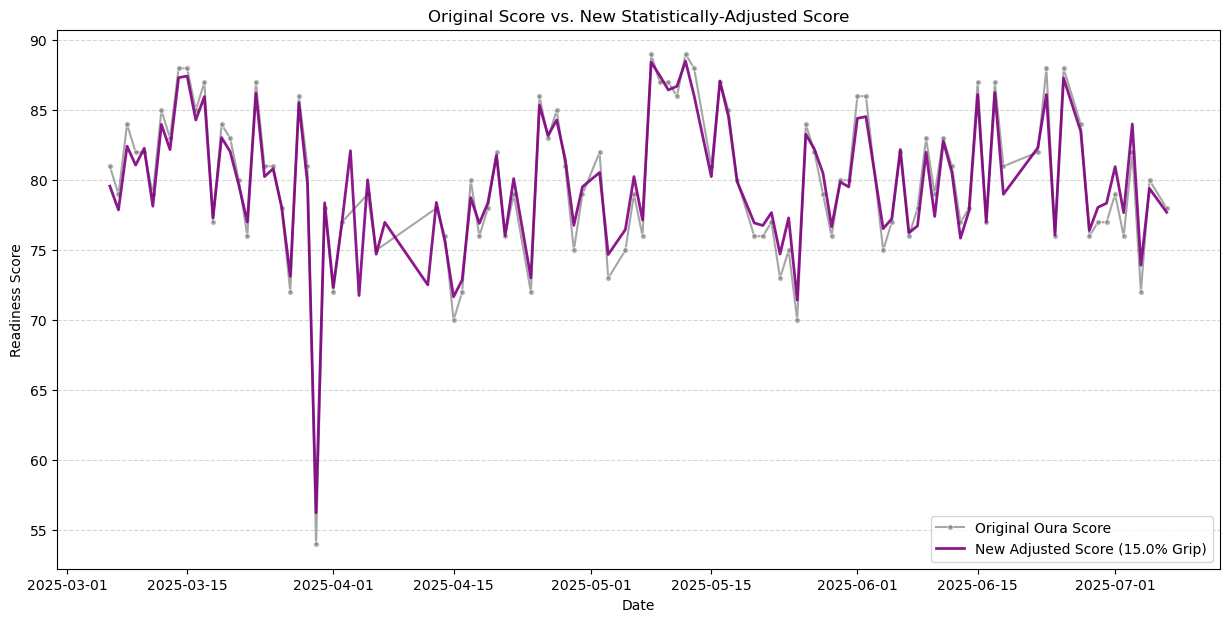


--- Days where Grip made the biggest POSITIVE impact ---
           day  score  New_Adjusted_Score  squegg_grip_imputed  \
70  2025-05-24   75.0           77.307947                159.2   
24  2025-03-30   54.0           56.250150                141.0   
105 2025-07-03   82.0           84.015833                163.5   
103 2025-07-01   79.0           80.972326                160.7   
106 2025-07-04   72.0           73.929560                154.5   

     Grip_Strength_Zscore  Score_Change  
70               1.956709      2.307947  
24              -2.042796      2.250150  
105              2.901647      2.015833  
103              2.286339      1.972326  
106              0.923870      1.929560  

--- Days where Grip made the biggest NEGATIVE impact ---
          day  score  New_Adjusted_Score  squegg_grip_imputed  \
94 2025-06-18   81.0           78.997460               139.85   
61 2025-05-13   88.0           86.031413               146.00   
96 2025-06-23   88.0           86.119539

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- 1. Isolate and Impute 'squegg_grip' ---
# We use linear interpolation to fill missing grip values
df['squegg_grip_imputed'] = df['Squegg_Grip'].interpolate(method='linear', limit_direction='both')

# --- 2. Standardize 'squegg_grip' (Create a Z-Score) ---
# We must .dropna() for the scaler, as it can't handle NaNs
grip_data = df['squegg_grip_imputed'].dropna().values.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(grip_data)

# Transform the full column (NaNs will result, that's OK)
df['Grip_Strength_Zscore'] = scaler.transform(df[['squegg_grip_imputed']])

# --- 3. Get Oura Score Stats ---
# We need to know the 'mean' and 'std dev' of your real Oura score
# to map our grip score onto the same scale.
score_mean = df['score'].mean()
score_std = df['score'].std()

print(f"Original Oura Score -> Mean: {score_mean:.1f}, Std Dev: {score_std:.1f}")

# --- 4. Create the 'Grip_Score_Equivalent' ---
# Convert the Z-score (mean=0, std=1) to the Oura score scale
df['Grip_Score_Equivalent'] = (df['Grip_Strength_Zscore'] * score_std) + score_mean

# --- 5. Define Weights and Create Final Adjusted Score ---
# This is where YOU decide the importance. Let's start with 15%.
GRIP_WEIGHT = 0.15  # 15%
OURA_WEIGHT = 1.0 - GRIP_WEIGHT

# Fill NaNs in the components before combining
df['score_filled'] = df['score'].fillna(df['Grip_Score_Equivalent'])
df['Grip_Score_Equivalent_filled'] = df['Grip_Score_Equivalent'].fillna(df['score_filled'])

# Calculate the new score
df['New_Adjusted_Score'] = (df['score_filled'] * OURA_WEIGHT) + (df['Grip_Score_Equivalent_filled'] * GRIP_WEIGHT)

# Clip to 0-100 range
df['New_Adjusted_Score'] = df['New_Adjusted_Score'].clip(0, 100)

print(f"\nCreated 'New_Adjusted_Score' with {GRIP_WEIGHT*100}% Grip Weight.")

# --- 6. Visualize the Result ---
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='day', y='score', label='Original Oura Score', color='gray', alpha=0.7, marker='o', markersize=4)
sns.lineplot(data=df, x='day', y='New_Adjusted_Score', label=f'New Adjusted Score ({GRIP_WEIGHT*100}% Grip)', color='purple', alpha=0.9, linewidth=2)
plt.title('Original Score vs. New Statistically-Adjusted Score')
plt.ylabel('Readiness Score')
plt.xlabel('Date')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- 7. See the difference ---
df_analysis = df[['day', 'score', 'New_Adjusted_Score', 'squegg_grip_imputed', 'Grip_Strength_Zscore']].copy()
df_analysis['Score_Change'] = df_analysis['New_Adjusted_Score'] - df_analysis['score']

print("\n--- Days where Grip made the biggest POSITIVE impact ---")
print(df_analysis.sort_values(by='Score_Change', ascending=False).head(5))
print("\n--- Days where Grip made the biggest NEGATIVE impact ---")
print(df_analysis.sort_values(by='Score_Change', ascending=True).head(5))

In [3]:
import os
from sklearn.ensemble import RandomForestRegressor

# Suggested EDA plots for a poster (generates & saves figures)
# - Correlation heatmap (overall view)
# - Top correlations with 'score' (bar chart)
# - Time series: score vs grip (7-day rolling) (clear trend)
# - Boxplots of grip devices (compare distributions / variability)
# - Scatter + regression for the top grip vs score (relationship)
# - (Optional) Feature importance if available


os.makedirs("eda_plots", exist_ok=True)

# 1) Correlation heatmap (numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'score' not in numeric_cols:
    numeric_cols.append('score')  # ensure target included for heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.savefig("eda_plots/corr_heatmap.png", dpi=150)
plt.close()

# 2) Bar chart: features most correlated with score
corr_with_score = corr['score'].drop('score').sort_values(ascending=False)
top_n = 12
plt.figure(figsize=(8,6))
corr_with_score.head(top_n).sort_values().plot(kind='barh', color='teal')
plt.title(f"Top {top_n} Positive Correlations with Score")
plt.xlabel("Pearson Correlation")
plt.tight_layout()
plt.savefig("eda_plots/top_pos_correlations.png", dpi=150)
plt.close()

plt.figure(figsize=(8,6))
corr_with_score.tail(top_n).sort_values().plot(kind='barh', color='coral')
plt.title(f"Top {top_n} Negative Correlations with Score")
plt.xlabel("Pearson Correlation")
plt.tight_layout()
plt.savefig("eda_plots/top_neg_correlations.png", dpi=150)
plt.close()

# 3) Time series: 7-day rolling of score and a grip index
ts_grip_col = None
if 'Grip_Strength_Index' in df.columns:
    ts_grip_col = 'Grip_Strength_Index'
else:
    # fallback: first available grip/pinch column
    grip_candidates = [c for c in df.columns if ("grip" in c.lower() or "pinch" in c.lower())]
    ts_grip_col = grip_candidates[0] if grip_candidates else None

if 'day' in df.columns and ts_grip_col is not None:
    ts = df.set_index('day').sort_index()
    ts_score = ts['score'].rolling(7, min_periods=1).mean()
    ts_grip = ts[ts_grip_col].rolling(7, min_periods=1).mean()
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(ts_score.index, ts_score, color='dodgerblue', label='7-day Avg Score')
    ax1.set_ylabel('Score', color='dodgerblue')
    ax2 = ax1.twinx()
    ax2.plot(ts_grip.index, ts_grip, color='crimson', label=f'7-day Avg {ts_grip_col}')
    ax2.set_ylabel(ts_grip_col, color='crimson')
    plt.title("7-Day Rolling Average: Score vs Grip")
    fig.tight_layout()
    plt.savefig("eda_plots/score_vs_grip_timeseries.png", dpi=150)
    plt.close()

# 4) Boxplots of grip devices (show distribution & variability)
grip_cols = [c for c in df.columns if ("grip" in c.lower() or "pinch" in c.lower())]
if grip_cols:
    melt = df[grip_cols].melt(var_name='device', value_name='value')
    plt.figure(figsize=(12,6))
    sns.boxplot(data=melt, x='device', y='value', palette='pastel')
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribution of Grip/Pinch Measurements by Device")
    plt.tight_layout()
    plt.savefig("eda_plots/grip_boxplots.png", dpi=150)
    plt.close()

# 5) Scatter + regression for top correlated feature vs score
if not corr_with_score.empty:
    top_feature = corr_with_score.index[0]
    if top_feature in df.columns:
        plt.figure(figsize=(7,6))
        sns.regplot(x=top_feature, y='score', data=df, scatter_kws={'alpha':0.6})
        plt.title(f"Score vs {top_feature} (with trend line)")
        plt.tight_layout()
        plt.savefig("eda_plots/score_vs_top_feature.png", dpi=150)
        plt.close()

# 6) Optional: Feature importance plot if 'importance_df' exists or can be computed
try:
    if 'importance_df' in globals():
        imp_df = importance_df.copy().head(15)
        plt.figure(figsize=(8,6))
        sns.barplot(data=imp_df, x='Importance', y='Feature', palette='viridis')
        plt.title("Model Feature Importances (RandomForest)")
        plt.tight_layout()
        plt.savefig("eda_plots/feature_importance_rf.png", dpi=150)
        plt.close()
    else:
        # quick fallback: compute a simple feature importance using RandomForest on numeric features
        rf_cols = [c for c in numeric_cols if c!='score']
        rf_df = df.dropna(subset=rf_cols + ['score'])
        if len(rf_df) > 20 and rf_cols:
            rf = RandomForestRegressor(n_estimators=200, random_state=0)
            rf.fit(rf_df[rf_cols], rf_df['score'])
            imp = pd.DataFrame({'Feature': rf_cols, 'Importance': rf.feature_importances_}).sort_values('Importance', ascending=False).head(15)
            plt.figure(figsize=(8,6))
            sns.barplot(data=imp, x='Importance', y='Feature', palette='magma')
            plt.title("Estimated Feature Importances (RF fallback)")
            plt.tight_layout()
            plt.savefig("eda_plots/feature_importance_rf_fallback.png", dpi=150)
            plt.close()
except Exception as e:
    print("Skipping feature importance plot:", e)

print("EDA plots saved to ./eda_plots/ (heatmap, correlation bars, timeseries, boxplots, scatter, and optional feature importance).")

C:\Users\omkar\AppData\Local\Temp\ipykernel_22288\1846797990.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melt, x='device', y='value', palette='pastel')
C:\Users\omkar\AppData\Local\Temp\ipykernel_22288\1846797990.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp, x='Importance', y='Feature', palette='magma')


EDA plots saved to ./eda_plots/ (heatmap, correlation bars, timeseries, boxplots, scatter, and optional feature importance).
